# Support Vector Machine Classification
Support Vector Machine that will find the optimal hyperplane that maximizes the margin between two toy data classes using gradient descent.

## Using only numpy and matplotlib

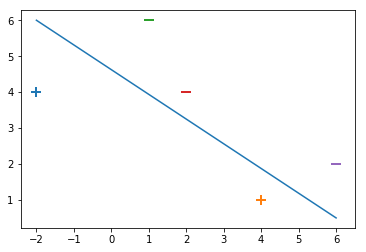

In [1]:
'''
    _________         _________
   /         \       /         \   DrMrSnake
  /  /~~~~~\  \     /  /~~~~~\  \  
  |  |     |  |     |  |     |  |        /
  |  |     |  |     |  |     |  |       //
-(o--o)-   \  \_____/  /     \  \_____/ /
  \__/      \         /       \        /
   |         ~~~~~~~~~         ~~~~~~~~

'''

# to perform math operations
import numpy as np
# to plot data
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1- Define Data

# form [X value, Y value, Bias term]
X = np.array([
    [-2,4,-1],
    [4,1,-1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

#output labels - First 2 examples are labeled '-1' and last 3 are labeled '+1'
y = np.array([-1,-1,1,1,1])

for index,item in enumerate(X):
    if index < 2:
        plt.scatter(x = item[0],y = item[1],marker='+',lw=2,s=120)
    else:
        plt.scatter(x = item[0],y = item[1],marker='_',lw=2,s=120)
        
# random line seperating the data
plt.plot([-2,6],[6,0.5])

In [2]:
# stochastic gradient descent 

def svm_sgd_plot(X,Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    w = np.zeros(len(X[0]))
    # learning rate
    eta = 1
    # iterations to train for
    epochs = 100000
    # error list, to plot them later
    errors = []
    
    # training
    for epoch in range(1,epochs):
        error = 0
        for index, item in enumerate(X):
            # misclassifications
            if (Y[index]*np.dot(X[index], w)) < 1:
                # update weights 
                w = w + eta * ( (X[index] * Y[index]) + (-2  *(1/epoch)* w) ) 
                error = 1
            else:
                # correct classification
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)  

    plt.plot(errors,'|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

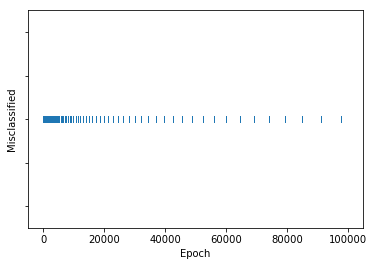

In [3]:
w = svm_sgd_plot(X,y)

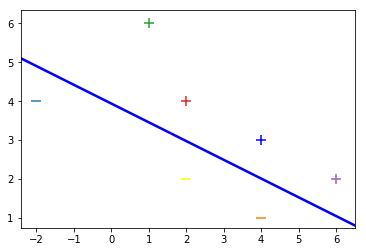

In [4]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')